In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
seasonality_path = "C:\\Users\\andrii.prysiazhnyk\\Documents\data\\dynamic_pricing\\data\\seasonality.csv"
seasonality = list(pd.read_csv(seasonality_path)["Seasonality"])
seasonality_coefficient = 0.4842866956976883
k0 = 200
k1 = -133
k = 0.006060606060606061

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def sales(t, price, c_price, prev_price, prev_c_price):
    s = seasonality_coefficient * seasonality[t]
#     p = (k0 + k1 * price / c_price) * (1 + np.tanh(k * (k0 + k1 * prev_price / prev_c_price)))
    #p = (k0 + k1 * price / c_price) * (prev_c_price / prev_price) ** 0.5
#     p = (k0 + k1 * price / c_price) * sigmoid(k * (k0 + k1 * prev_price / prev_c_price))
    p = (k0 + k1 * price / c_price) * sigmoid(k * prev_price)
    return s + p

In [6]:
def get_optimal_price(t, c_price, prev_price, prev_c_price):
    s = seasonality_coefficient * seasonality[t]
#     c1 = (k1 / c_price) * (1 + np.tanh(k * (k0 + k1 * (prev_price / prev_c_price))))
#     c2 = k0 * (1 + np.tanh(k * (k0 + k1 * (prev_price / prev_c_price))))
    #c1 = (k1 / c_price) * (prev_c_price / prev_price) ** 0.5
    #c2 = k0 * (prev_c_price / prev_price)
#     c1 = (k1 / c_price) * sigmoid(k * (k0 + k1 * prev_price / prev_c_price))
#     c2 = k0 * sigmoid(k * (k0 + k1 * prev_price / prev_c_price))
    
    c1 = (k1 / c_price) * sigmoid(k * prev_price)
    c2 = k0 * sigmoid(k * prev_price)
    
    optimal_price = prime_cost / 2 - s / (2 * c1) - c2 / (2 * c1)
    return optimal_price

In [7]:
def reward(t, price, c_price, prev_price, prev_c_price):
    return sales(t, price, c_price, prev_price, prev_c_price) * (price - prime_cost)

In [8]:
def get_random_state():
    return np.random.randint(1, 53), \
           min_price + (max_price - min_price) * np.random.rand(), \
           min_price + (max_price - min_price) * np.random.rand(), \
           min_price + (max_price - min_price) * np.random.rand()

In [9]:
prime_cost = 100
min_price, max_price = 2 * prime_cost, 3 * prime_cost

In [10]:
def validate(agent):
    prices = []
    rewards = []
    episodes = 1000

    t, c_price, prev_price, prev_c_price = get_random_state()
    t = 0
    prev_price = (min_price + max_price) / 2

    for i in range(episodes):
        t, c_price, prev_price, prev_c_price = get_random_state()
        t = 0
        prev_price = (min_price + max_price) / 2
        c = 0

        
        for i in range(52):
            price = agent.act(t, c_price, prev_price, prev_c_price)
            prices.append(price)
            r = reward(t, price, c_price, prev_price, prev_c_price)
#             rewards.append(r)
            c += r
    #         t, c_price, prev_price, prev_c_price = get_random_state()
    #         t -= 1
            t = (t + 1) % 52
            prev_c_price = c_price
            prev_price = price
            c_price = min_price + (max_price - min_price) * np.random.rand()
        rewards.append(c)
        
    prices = pd.Series(prices)
    rewards = pd.Series(rewards)
    return prices, rewards

In [11]:
class GREEDY:
    def act(self, t, c_price, prev_price, prev_c_price):
        price = get_optimal_price(t, c_price, prev_price, prev_c_price)

        if price > max_price:
            price = max_price
        elif price < min_price:
            price = min_price
        return price

class MIN:
    def act(self, t, c_price, prev_price, prev_c_price):
        return min_price

class MAX:
    def act(self, t, c_price, prev_price, prev_c_price):
        return max_price

class RAND:
    def act(self, t, c_price, prev_price, prev_c_price):
        return min_price + (max_price - min_price) * np.random.rand()

In [12]:
g = GREEDY()
mn = MIN()
mx = MAX()
r = RAND()

In [13]:
g_p, g_r = validate(g)

<AxesSubplot:>

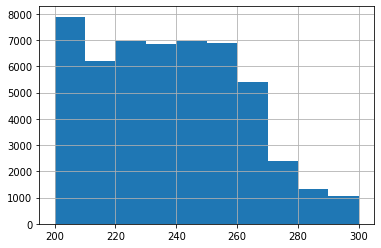

In [14]:
g_p.hist()

In [15]:
g_r.mean()

428366.1478996645

In [16]:
mn_p, mn_r = validate(mn)

<AxesSubplot:>

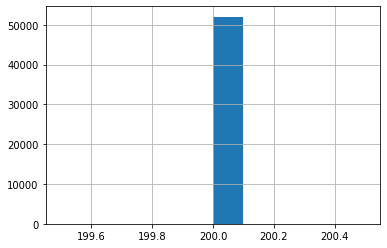

In [17]:
mn_p.hist()

In [18]:
mn_r.mean()

369773.4558886587

In [19]:
mx_p, mx_r = validate(mx)

<AxesSubplot:>

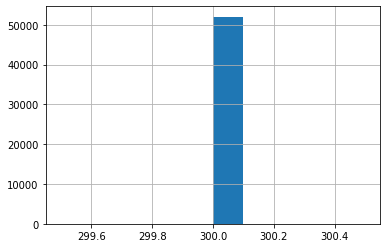

In [20]:
mx_p.hist()

In [21]:
mx_r.mean()

340639.8558825891

In [22]:
r_p, r_r = validate(r)

<AxesSubplot:>

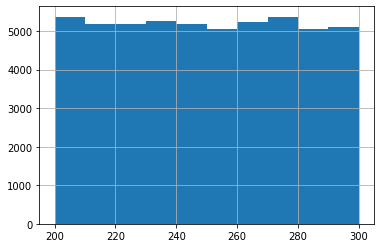

In [23]:
r_p.hist()

In [24]:
r_r.mean()

397223.78228520084

In [28]:
(g_r < r_r).sum()

72

In [29]:
g_r.shape

(1000,)